In [1]:
from qiskit import *
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo

## Parametres

In [3]:
L=6
tmax=2
divisions=11
dt=tmax/(divisions-1)
J=h=1

## Implementació Portes

In [46]:
def U_exp(self, qreg,alpha) : #esponencial de sigmaxsgigmax + sigmaysigmay
    sub_q = QuantumRegister(2)
    phi=2*alpha-(math.pi/2)
    landa=(math.pi/2)-2*alpha
    #portes que composen Ugen
    sub_circ = QuantumCircuit(sub_q, name = 'U_exp')
    sub_circ.rz(-math.pi/2,1)
    sub_circ.cx(1,0)
    sub_circ.rz(math.pi/2,0)
    sub_circ.ry(phi,1)
    sub_circ.cx(0,1)
    sub_circ.ry(landa,1)
    sub_circ.cx(1,0)
    sub_circ.rz(math.pi/2,0)
    
    sub_inst = sub_circ.to_instruction()
    self.append(sub_inst,qreg)

In [47]:
def circ_XX(L,dt,pas,J,h): #circuit per a n pasos
    phi_z=-h*dt
    alpha=-J*dt

    qrr=QuantumRegister(L)
    crr=ClassicalRegister(L)
    circ = QuantumCircuit(qrr,crr)
    #estat inicial
    circ.x(0)
    circ.x(1)
    circ.x(2)
    circ.barrier()

    for s in range(pas):
        #hamiltonia a i b
        for q in range(0,L,2):
            U_exp(circ,qrr[q:q+2],alpha)
        for q in range(1,L-1,2):
            U_exp(circ,qrr[q:q+2],alpha)
        circ.barrier()

        #hamiltonia c
        #he afegit un dos per com esta definida
        for qubit in range(L):
            circ.rz(2*phi_z,qubit)
        circ.barrier()

    #Mesura
    circ.measure(range(L),range(L))
    #circ.draw(output='mpl')
    return circ

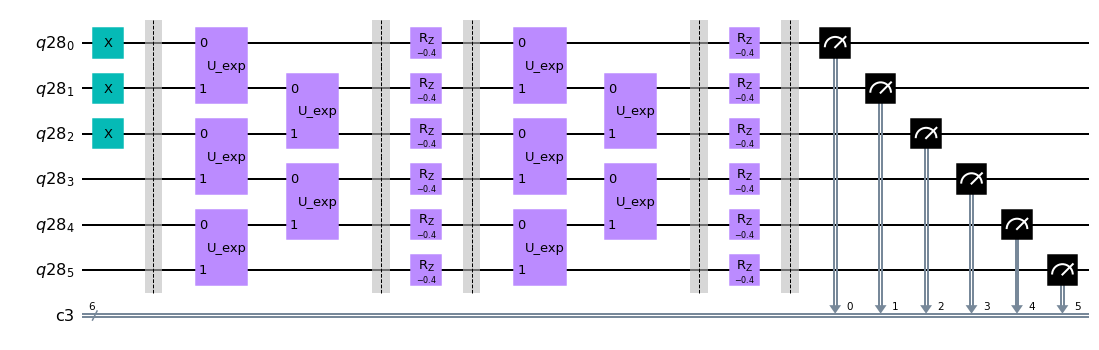

In [10]:
circ_XX(L,dt,2,J,h).draw(output='mpl')

## Mesura 

In [48]:
simulator = Aer.get_backend('qasm_simulator')
qcomp = provider.get_backend('ibmq_manila')
num_shots=8192
res=[]
for pas in range(divisions):
    circuit = circ_XX(L,dt,pas,J,h)
    result = execute(circuit, backend = simulator, shots = num_shots).result()
    counts = result.get_counts()
    res.append(counts)

In [49]:
n=len(res)
mag=np.zeros((L,n))
for j in range(n):
    dic=res[j]
    for key, value in dic.items() :
        for i in range(L):
            if key[i]=='0':
                mag[i,j]=mag[i,j]+ value*(-1)/num_shots
            else:
                mag[i,j]=mag[i,j]+ value/num_shots

In [50]:
np.save('spinsquantumsim6', mag)

In [11]:
circuit = circ_XX(L,dt,3,J,h)
qcomp = provider.get_backend('ibmq_manila')
job=execute(circuit, backend=qcomp,shots=8192)

## Recuperacio dades 4 spins

In [9]:
id_pas=[]
id_pas.append('6273970b5758cf0390c99cbb')
id_pas.append('627395d22a75603730d08cf8')
id_pas.append('627395cf08b8c5450c62d2de')
id_pas.append('627395cc5758cfc8e1c99cad')
id_pas.append('627395c82a75601610d08cf6')
id_pas.append('627395c41d469e68fd60b8d1')
id_pas.append('62738e20938170e73d3e700f')
id_pas.append('62738e1c530a860a42b1f2c4')
id_pas.append('62738e17530a862961b1f2c3')
id_pas.append('62738e1482fcde2ff2401723')
id_pas.append('62738e0e530a86d771b1f2c2')
qcomp = provider.get_backend('ibmq_manila')

In [10]:
job_pas=[]
for i in range(divisions):
    job_pas.append(qcomp.retrieve_job(id_pas[i]))
resultats=[]
for i in range(divisions):
    counts=job_pas[i].result().get_counts()
    resultats.append(counts)
n=len(resultats)
num_shots=8192
mag=np.zeros((L,n))
for j in range(n):
    dic=resultats[j]
    for key, value in dic.items() :
        for i in range(L):
            if key[i]=='0':
                mag[i,j]=mag[i,j]+ value*(-1)/num_shots
            else:
                mag[i,j]=mag[i,j]+ value/num_shots

In [11]:
np.save('spinsquantum', mag)

## Recuperació dades 6 spins

In [4]:
id_pas=[]
id_pas.append('62b9e960bd18a2d31d3277fa')
id_pas.append('62b9e964b3f3481875f24fac')
id_pas.append('62b9e9716a05a589b08dcb11')
id_pas.append('62b9e9a740f15427bdafc26f')
id_pas.append('62b9e9acb343f065235f13cf')
id_pas.append('62b9f3aabd18a23d3332781b')
id_pas.append('62b9f3c840f1545084afc28c')
id_pas.append('62b9f437b343f0d9c65f13f0')
id_pas.append('62b9f43bbd18a283f032781e')
id_pas.append('62b9f4485a1cb04fb1774f18')
id_pas.append('62bac67e0133391b3fdde786')
qcomp = provider.get_backend('ibm_oslo')

In [5]:

L=6
job_pas=[]
for i in range(divisions):
    job_pas.append(qcomp.retrieve_job(id_pas[i]))
resultats=[]
for i in range(divisions):
    counts=job_pas[i].result().get_counts()
    resultats.append(counts)
n=len(resultats)
num_shots=8192
mag=np.zeros((L,n))
for j in range(n):
    dic=resultats[j]
    for key, value in dic.items() :
        for i in range(L):
            if key[i]=='0':
                mag[i,j]=mag[i,j]+ value*(-1)/num_shots
            else:
                mag[i,j]=mag[i,j]+ value/num_shots

In [6]:
np.save('spinsquantum6', mag)